In [1]:
import PIL as pil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from time import time
import os
import pandas as pd

import libarary.graph_tools as gtl
import libarary.cpp as cpp
print('Pillow Version:', pil.__version__)
cpp.test()

Pillow Version: 10.0.0
hello worlsd
 304278004800


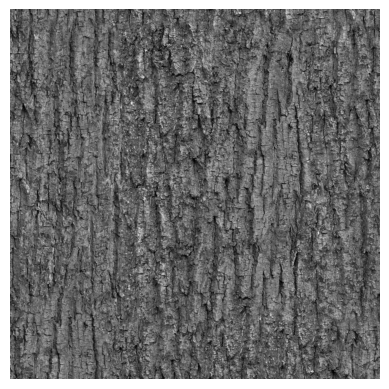

(1024, 1024)


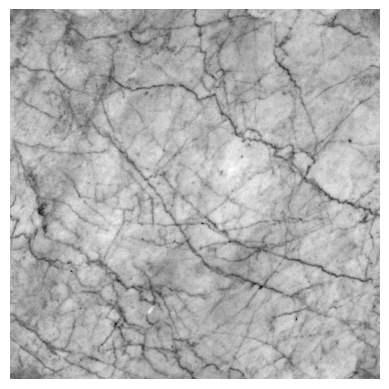

(512, 512)


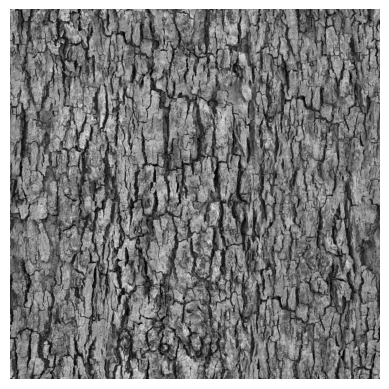

(1024, 1024)


In [2]:
src_images = ["2-1", "2-2", "2-3"]
imgs = []
for src in src_images:
    img = Image.open("pictures/" + src+".jpg").convert("L")
    plt.imshow(img,"gray")
    plt.axis('off')
    plt.savefig("plots/" + src + "_gray.png",bbox_inches='tight')
    plt.show()
    print(img.size)
    tmp = np.array(img, "double")
    centery = tmp.shape[0]//2
    centerx = tmp.shape[1]//2
    imgs.append(tmp[centery-110:centery+110,centerx-110:centerx+110])





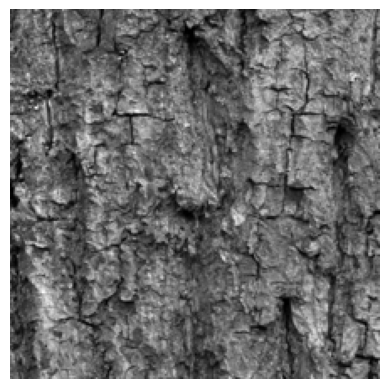

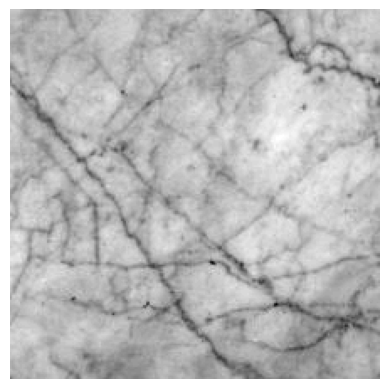

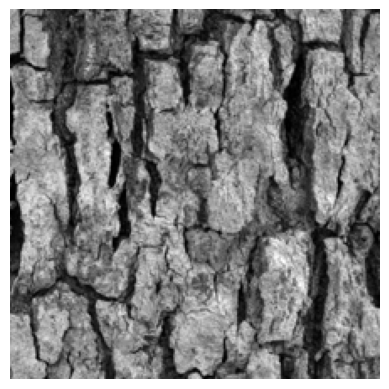

In [3]:
for img in imgs:
    plt.imshow(img,"gray")
    plt.axis("off")
    plt.show()


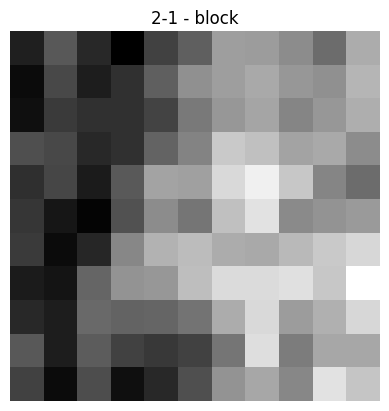

,0
q_ext3_multi,0.008333
q_ext4_multi,0.008333
excess,356.000000
q_packing3_multi,11.500000
q_packing4_multi,16.000000


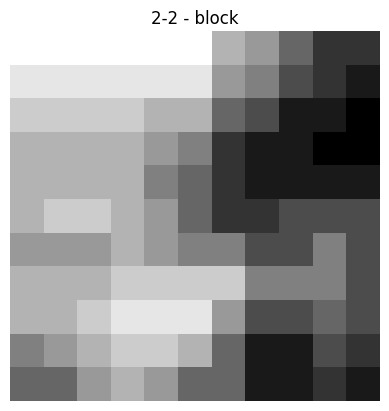

,0
q_ext3_multi,0.004821
q_ext4_multi,0.007782
excess,84.000000
q_packing3_multi,0.000000
q_packing4_multi,0.000000


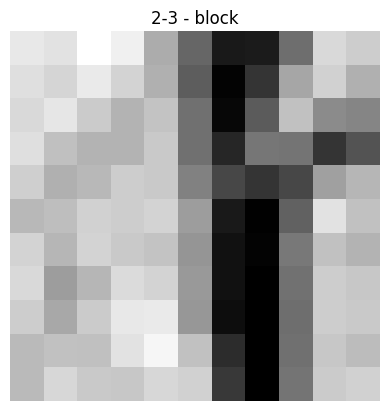

,0
q_ext3_multi,0.008333
q_ext4_multi,0.008333
excess,486.000000
q_packing3_multi,4.500000
q_packing4_multi,6.500000


In [4]:
from experiment import block_exp, img_exp
import pandas as pd
block_size = 11
for img,name in zip(imgs,src_images):
    block = img[0:block_size,0:block_size]
    plt.imshow(block,'gray')
    plt.axis("off")
    plt.savefig("plots/" + name + "_block" + ".png", bbox_inches='tight')
    plt.title(name + " - block")
    plt.show()
    pth = "results/" + "block" + name
    try:
        os.mkdir(pth)
    except:
        pass
    df = pd.DataFrame(pd.Series(block_exp(block)))
    display(df)
    df.to_excel(pth+  "/block.xlsx")

    
    


220 220
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
name:  2-1


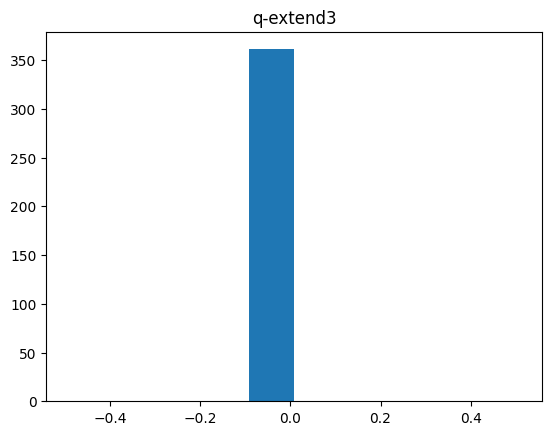

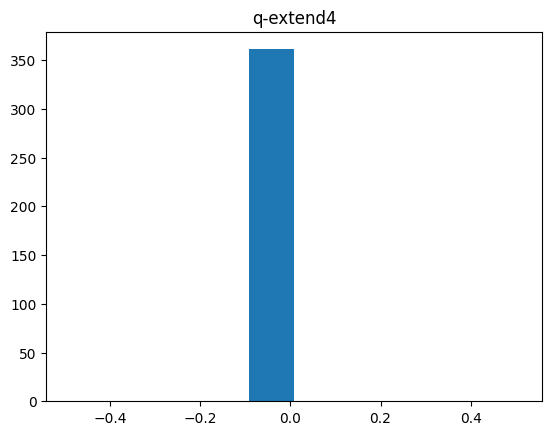

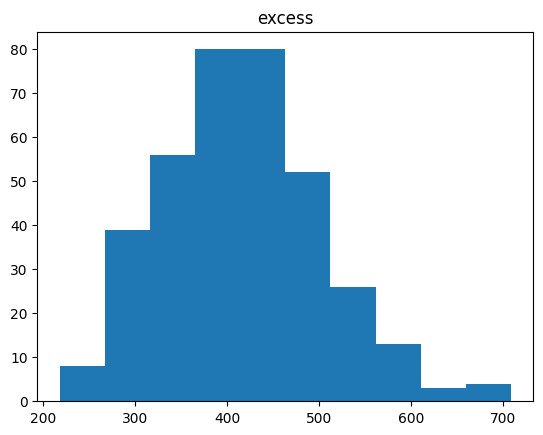

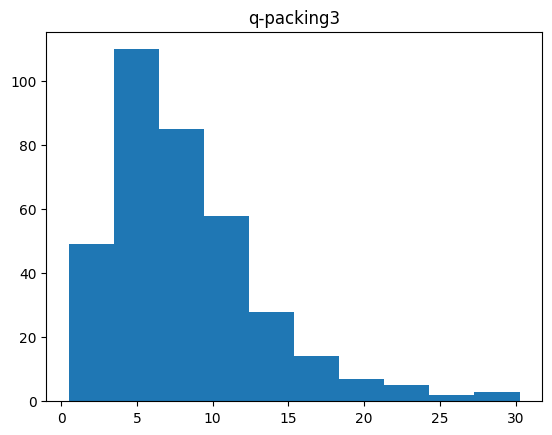

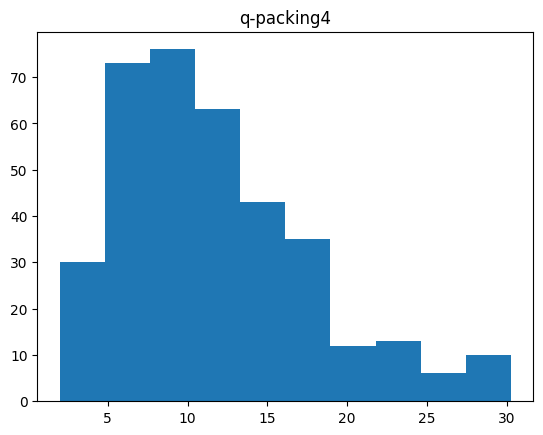

220 220
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
name:  2-2


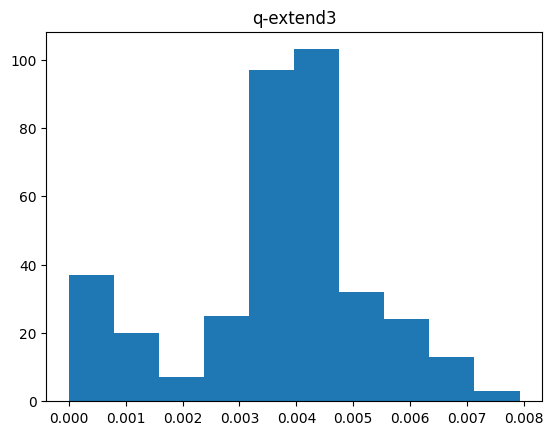

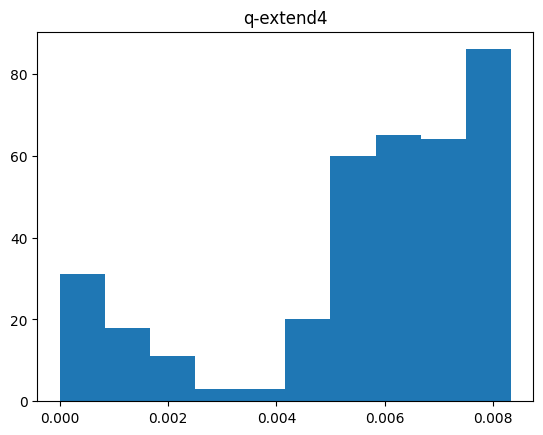

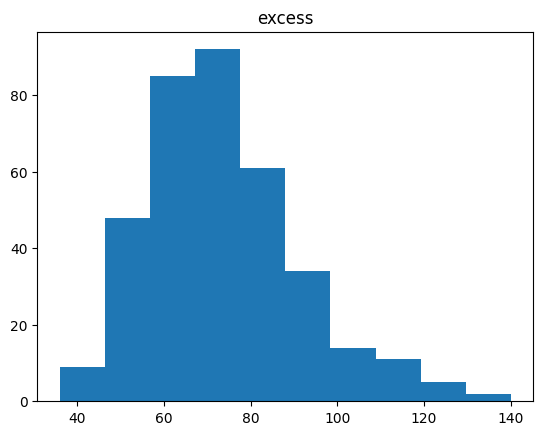

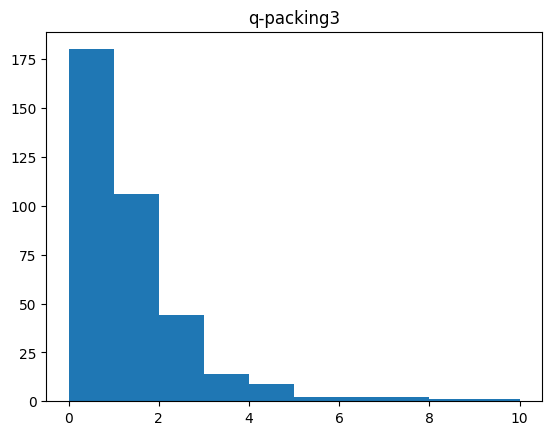

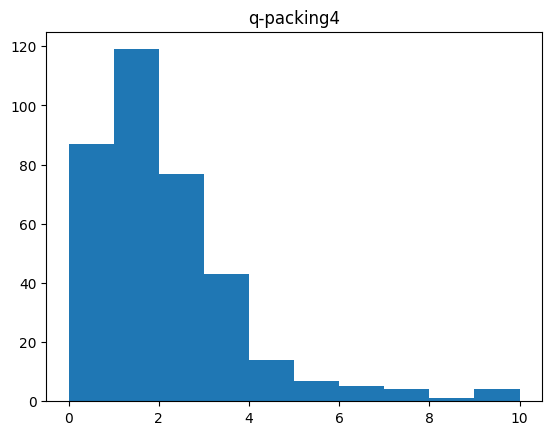

220 220
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
name:  2-3


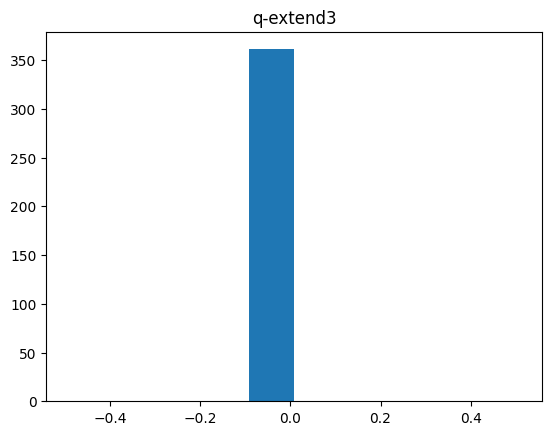

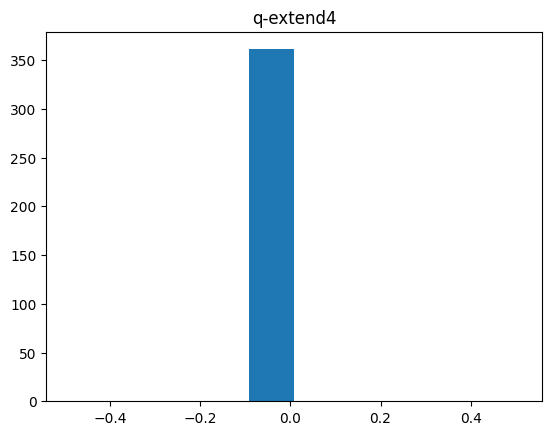

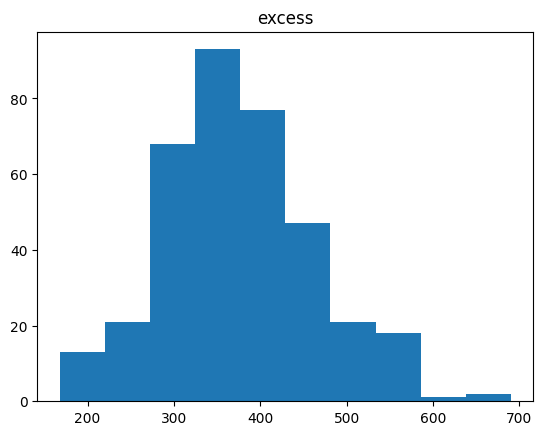

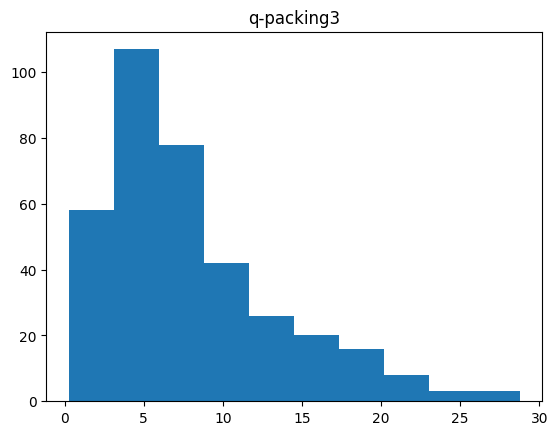

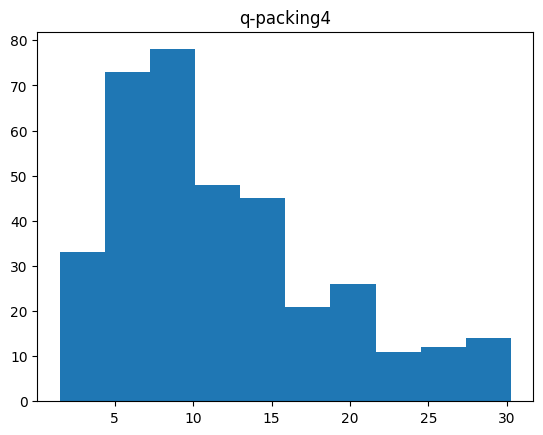

In [5]:

def deal_with_res(res:dict, name:str):
    print("name: ", name)
    pth = "results/" + "block" + name
    try:
        os.mkdir(pth)
    except:
        pass
    pd.DataFrame(res).to_excel(pth + "/results" + name + ".xlsx")

    pth_plot = "plots/" + "block" + name
    try:
        os.mkdir(pth_plot)
    except:
        pass
    for key in res.keys():
        counts, bins = np.histogram(res[key])
        plt.hist(bins[:-1], bins, weights=counts)
        plt.title(key)
        plt.savefig(pth_plot + "/"+key+".png")
        plt.show()


for img, name in zip(imgs, src_images):
    img_res = img_exp(img)
    deal_with_res(img_res, name)

    

In [6]:
img_res

{'q-extend3': [0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0